In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
dh = pd.read_csv(r"F:\dektop241205\health_app\lungcancer2\lungcancerdata.csv")

In [4]:
dh.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
dh['LUNG_CANCER'] = dh['LUNG_CANCER'].map({"YES": 1, "NO": 0})
dh['GENDER'] = dh['GENDER'].map({"M": 1, "F": 0})


In [6]:
dh.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


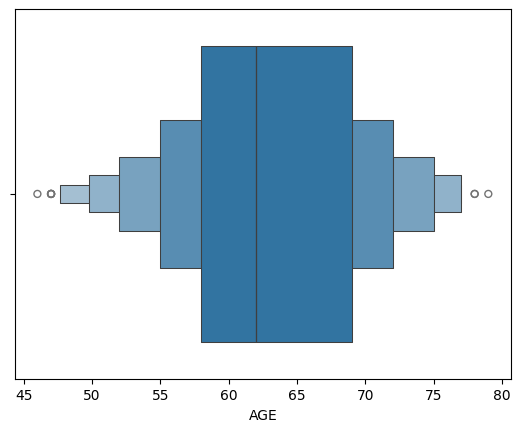

In [10]:
dh = dh[dh["AGE"] <= 80]
dh = dh[dh["AGE"] >= 45]
sn.boxenplot(x ="AGE",data=dh)
plt.show()

In [14]:
x = dh.drop(columns="LUNG_CANCER",axis=1)
y=dh["LUNG_CANCER"]
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x = scalar.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
randomstate1 = None
best_score1 = 0
for randomstate1 in range(1,1001):
    x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=randomstate1)
    model = LogisticRegression()
    model.fit(x_train,y_train)
    x_test_prediction = model.predict(x_test)
    trainingacc = accuracy_score(x_test_prediction,y_test)
    if trainingacc > best_score1:
        best_score1 = trainingacc
        best_randomscore = randomstate1
print(f"best random state:{best_randomscore}")
print(f"best score:{best_score1*100}")


best random state:720
best score:100.0


In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, random_state=720
)
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [17]:
import pickle
with open("lung_cance2.sav","wb")as f:
    pickle.dump(model,f)


In [18]:
import numpy as np
inputdata = (1,77,2,2,2,1,2,1,2,2,1,1,1,2,2)
inputarray = np.asarray(inputdata)
reshapedarray = inputarray.reshape(1, -1)
std_data = scalar.transform(reshapedarray)
predict = model.predict(std_data)

if predict[0] == 0:
    print("No Liver Disease Detected")
else:
    print("Liver Disease Detected")

Liver Disease Detected


c:\Users\aryan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
